In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
#read all words
words = open('hindi_names.txt','r').read().splitlines()
words = [w.lower() for w in words]
words[:8]

['aachal',
 'aadharsh',
 'aadhavi',
 'aadhira',
 'aadidev',
 'aadil',
 'aadita',
 'aaditya']

In [4]:
len(words)

2195

In [5]:
chars = sorted(list(set('.'.join(words))))

stoi = {s:i for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)


{0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [6]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([13163, 3]) torch.Size([13163])
torch.Size([1611, 3]) torch.Size([1611])
torch.Size([1608, 3]) torch.Size([1608])


In [10]:
Xtr[:7]

tensor([[ 0,  0,  0],
        [ 0,  0, 11],
        [ 0, 11, 21],
        [11, 21, 14],
        [21, 14,  1],
        [14,  1,  1],
        [ 1,  1, 12]])

In [75]:
Xtr.shape, Xtr.dtype, Ytr.shape,Ytr.dtype 

(torch.Size([13109, 3]), torch.int64, torch.Size([13109]), torch.int64)

In [76]:
k = [0]*10
print(''.join(itos[m] for m in k))



..........


In [42]:
C = torch.randn((27,2))
C

tensor([[ 1.3052,  0.0376],
        [-0.1583, -0.5615],
        [-0.3455,  1.2494],
        [-0.3647,  0.9484],
        [ 1.1511, -0.1585],
        [-0.0488, -0.8406],
        [-0.1185, -0.5552],
        [ 0.5772,  0.1493],
        [ 0.2962,  0.2219],
        [ 0.6210,  0.9091],
        [-0.6872,  0.4669],
        [ 0.7812,  1.0680],
        [-0.0443, -0.2321],
        [ 0.6257,  0.9454],
        [ 1.1768, -0.9271],
        [ 0.7702,  0.7102],
        [ 0.6994, -0.8417],
        [-0.7394,  1.0401],
        [-0.2836,  1.3831],
        [ 1.1050,  0.5231],
        [ 0.0611, -0.8194],
        [-0.6893,  1.1655],
        [ 1.5464, -1.3962],
        [-0.9138, -0.3530],
        [ 1.8618,  0.4062],
        [ 1.3582,  0.6187],
        [ 1.0514,  0.6765]])

In [86]:
emb = C[Xtr] 
emb.shape
emb


tensor([[[ 1.5674e+00, -2.3729e-01, -2.7385e-02,  ...,  6.0489e-01,
           7.9136e-02,  9.0462e-01],
         [ 1.5674e+00, -2.3729e-01, -2.7385e-02,  ...,  6.0489e-01,
           7.9136e-02,  9.0462e-01],
         [ 1.5674e+00, -2.3729e-01, -2.7385e-02,  ...,  6.0489e-01,
           7.9136e-02,  9.0462e-01]],

        [[ 1.5674e+00, -2.3729e-01, -2.7385e-02,  ...,  6.0489e-01,
           7.9136e-02,  9.0462e-01],
         [ 1.5674e+00, -2.3729e-01, -2.7385e-02,  ...,  6.0489e-01,
           7.9136e-02,  9.0462e-01],
         [-2.1286e-01,  5.0950e-01,  3.2713e-01,  ..., -1.1100e+00,
          -4.5285e-01, -4.9578e-01]],

        [[ 1.5674e+00, -2.3729e-01, -2.7385e-02,  ...,  6.0489e-01,
           7.9136e-02,  9.0462e-01],
         [-2.1286e-01,  5.0950e-01,  3.2713e-01,  ..., -1.1100e+00,
          -4.5285e-01, -4.9578e-01],
         [-1.1641e+00,  1.2473e+00, -2.7061e-01,  ..., -8.6249e-01,
          -1.2575e+00,  9.4180e-01]],

        ...,

        [[ 4.6827e-01, -6.5650e-01,

In [87]:
emb.shape

torch.Size([13109, 3, 10])

In [88]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [89]:
h = torch.tanh(emb.view(-1,6)@W1 + b1)

In [90]:
h

tensor([[ 0.9975,  0.9988, -0.8194,  ...,  0.4506,  0.9836,  0.8454],
        [ 0.6789, -0.9762, -0.8761,  ...,  0.8741,  0.0127, -0.9994],
        [-0.9758, -0.9035,  0.7424,  ..., -0.9594, -0.9999,  0.9416],
        ...,
        [ 0.9995, -0.2908, -0.9862,  ...,  0.9997,  0.9999,  0.7033],
        [ 0.9554,  0.9603, -0.9199,  ..., -0.9824, -0.9420, -0.9935],
        [ 0.1837,  0.7372,  0.7946,  ...,  0.6917, -1.0000,  0.9867]],
       grad_fn=<TanhBackward0>)

In [91]:
h.shape

torch.Size([65545, 100])

In [92]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [93]:
logits = h @ W2 + b2

In [94]:
logits.shape

torch.Size([65545, 27])

In [95]:
counts = logits.exp()

In [96]:
prob = counts / counts.sum(1, keepdims=True)

In [97]:
prob.shape

torch.Size([65545, 27])

In [98]:
loss = -prob[torch.arange(16382), Y].log().mean()
loss

tensor(15.8604, grad_fn=<NegBackward0>)

In [99]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [100]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [101]:
for p in parameters:
  p.requires_grad = True

In [102]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [103]:
lri = []
lossi = []
stepi = []

In [104]:
for i in range(200000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

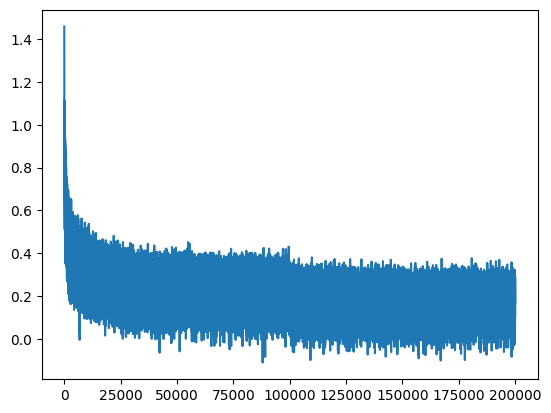

In [105]:
plt.plot(stepi, lossi)

In [106]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(1.5166, grad_fn=<NllLossBackward0>)

In [107]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.6555, grad_fn=<NllLossBackward0>)

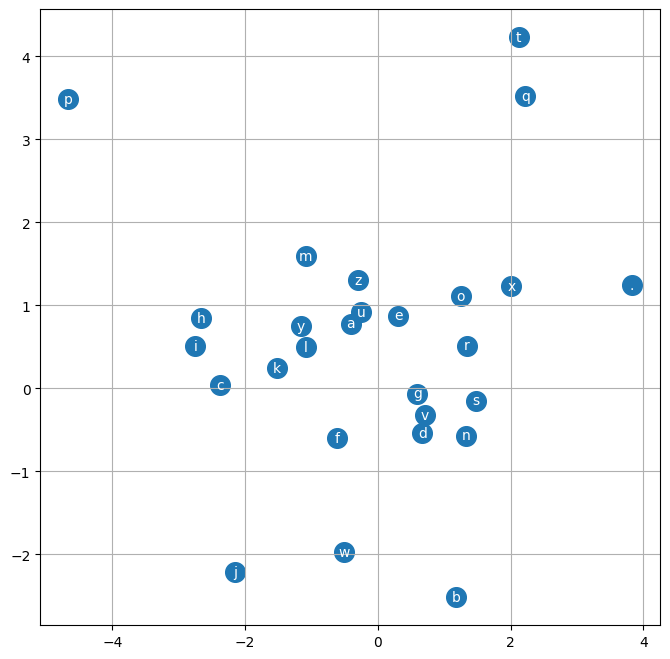

In [108]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [109]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [111]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(200):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

mritikanangi.
elan.
haram.
revarul.
jarveer.
deep.
see.
inder.
prasekhanvendrasthal.
kor.
kar.
nesh.
bhrithiranjay.
nirveer.
punya.
chi.
bhanveer.
yashi.
ehs.
kar.
avsh.
yas.
hir.
sadya.
suhauragufta.
rith.
tvarveerat.
pradit.
hira.
oppil.
tipu.
amranjeev.
ran.
vidas.
rishvikanakan.
iravansh.
priyansh.
amita.
kavishivan.
meet.
keer.
mohsini.
avdam.
cherry.
atim.
ant.
aija.
nihira.
lavajalendranika.
ritra.
inder.
vona.
thander.
kaushirugnan.
ambuj.
zarrhanamanitha.
jami.
jiya.
ama.
chamilashika.
cha.
chanika.
vijahant.
maazian.
aruddhaadhumaideepti.
abhikharp.
anuj.
saudamilash.
saine.
pranchirajveeram.
abir.
amaad.
anjanhav.
sha.
harkiravya.
azhi.
anural.
jiva.
nitya.
prad.
ariom.
sonica.
amrudayakshi.
anshu.
omya.
ehti.
indora.
jaib.
gavesh.
jogis.
jignant.
ana.
divyamara.
jahantik.
snoopur.
yukta.
kashodeepriya.
amridhaka.
prasim.
sha.
roubhuti.
idish.
ahim.
vidyada.
lad.
nal.
nirukriti.
arshaarjunangansh.
ani.
han.
kamang.
shi.
jamik.
shu.
devasanan.
ridhikalpanam.
sujana.
elak.
ham